# Pinch Test for Cohort 1

Comparing Pinch Tests between Cohort 1 and 2

In [13]:
import tdt
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sys
import os
sys.path.append(r'C:\Users\alber\OneDrive\Documents\GitHub\PCLAB_Photometry\P2_Code')

from tdt_class import *

In [14]:
experiment_path = r"C:\Users\alber\OneDrive\Documents\PC_Lab\Photometry\Pilot_2\Cohort 1\Synapse\Tanks\5_6_24_Pinch_Test_P2-240506-084710"
csv_base_path = r"C:\Users\alber\OneDrive\Documents\GitHub\PCLAB_Photometry\P2_Code\5_6_24_C1_Pinch_Test"
# single_recording_path = r"D:\Pilot 2\Cohort 2\Synapse\Tanks\P2_2_Pinch_Test-240820-080344\p8-240820-094440"
# bout_aggregated_csv_path = r"C:\Users\alber\OneDrive\Documents\GitHub\PCLAB_Photometry\P2_Code\08_20_24_C2_Pinch_Test\p8-240820-094440.csv"

## Bout Data from CSV

Found Synapse note file: C:\Users\alber\OneDrive\Documents\PC_Lab\Photometry\Pilot_2\Cohort 1\Synapse\Tanks\5_6_24_Pinch_Test_P2-240506-084710\n1-240506-101729\Notes.txt
read from t=0s to t=392.45s
Found Synapse note file: C:\Users\alber\OneDrive\Documents\PC_Lab\Photometry\Pilot_2\Cohort 1\Synapse\Tanks\5_6_24_Pinch_Test_P2-240506-084710\n2-240506-092628\Notes.txt
read from t=0s to t=467.44s
Found Synapse note file: C:\Users\alber\OneDrive\Documents\PC_Lab\Photometry\Pilot_2\Cohort 1\Synapse\Tanks\5_6_24_Pinch_Test_P2-240506-084710\n3-240506-094458\Notes.txt
read from t=0s to t=433.7s
Found Synapse note file: C:\Users\alber\OneDrive\Documents\PC_Lab\Photometry\Pilot_2\Cohort 1\Synapse\Tanks\5_6_24_Pinch_Test_P2-240506-084710\n4-240506-100119\Notes.txt
read from t=0s to t=420.31s
Found Synapse note file: C:\Users\alber\OneDrive\Documents\PC_Lab\Photometry\Pilot_2\Cohort 1\Synapse\Tanks\5_6_24_Pinch_Test_P2-240506-084710\p1-240506-103809\Notes.txt
read from t=0s to t=405.53s
Found Synap

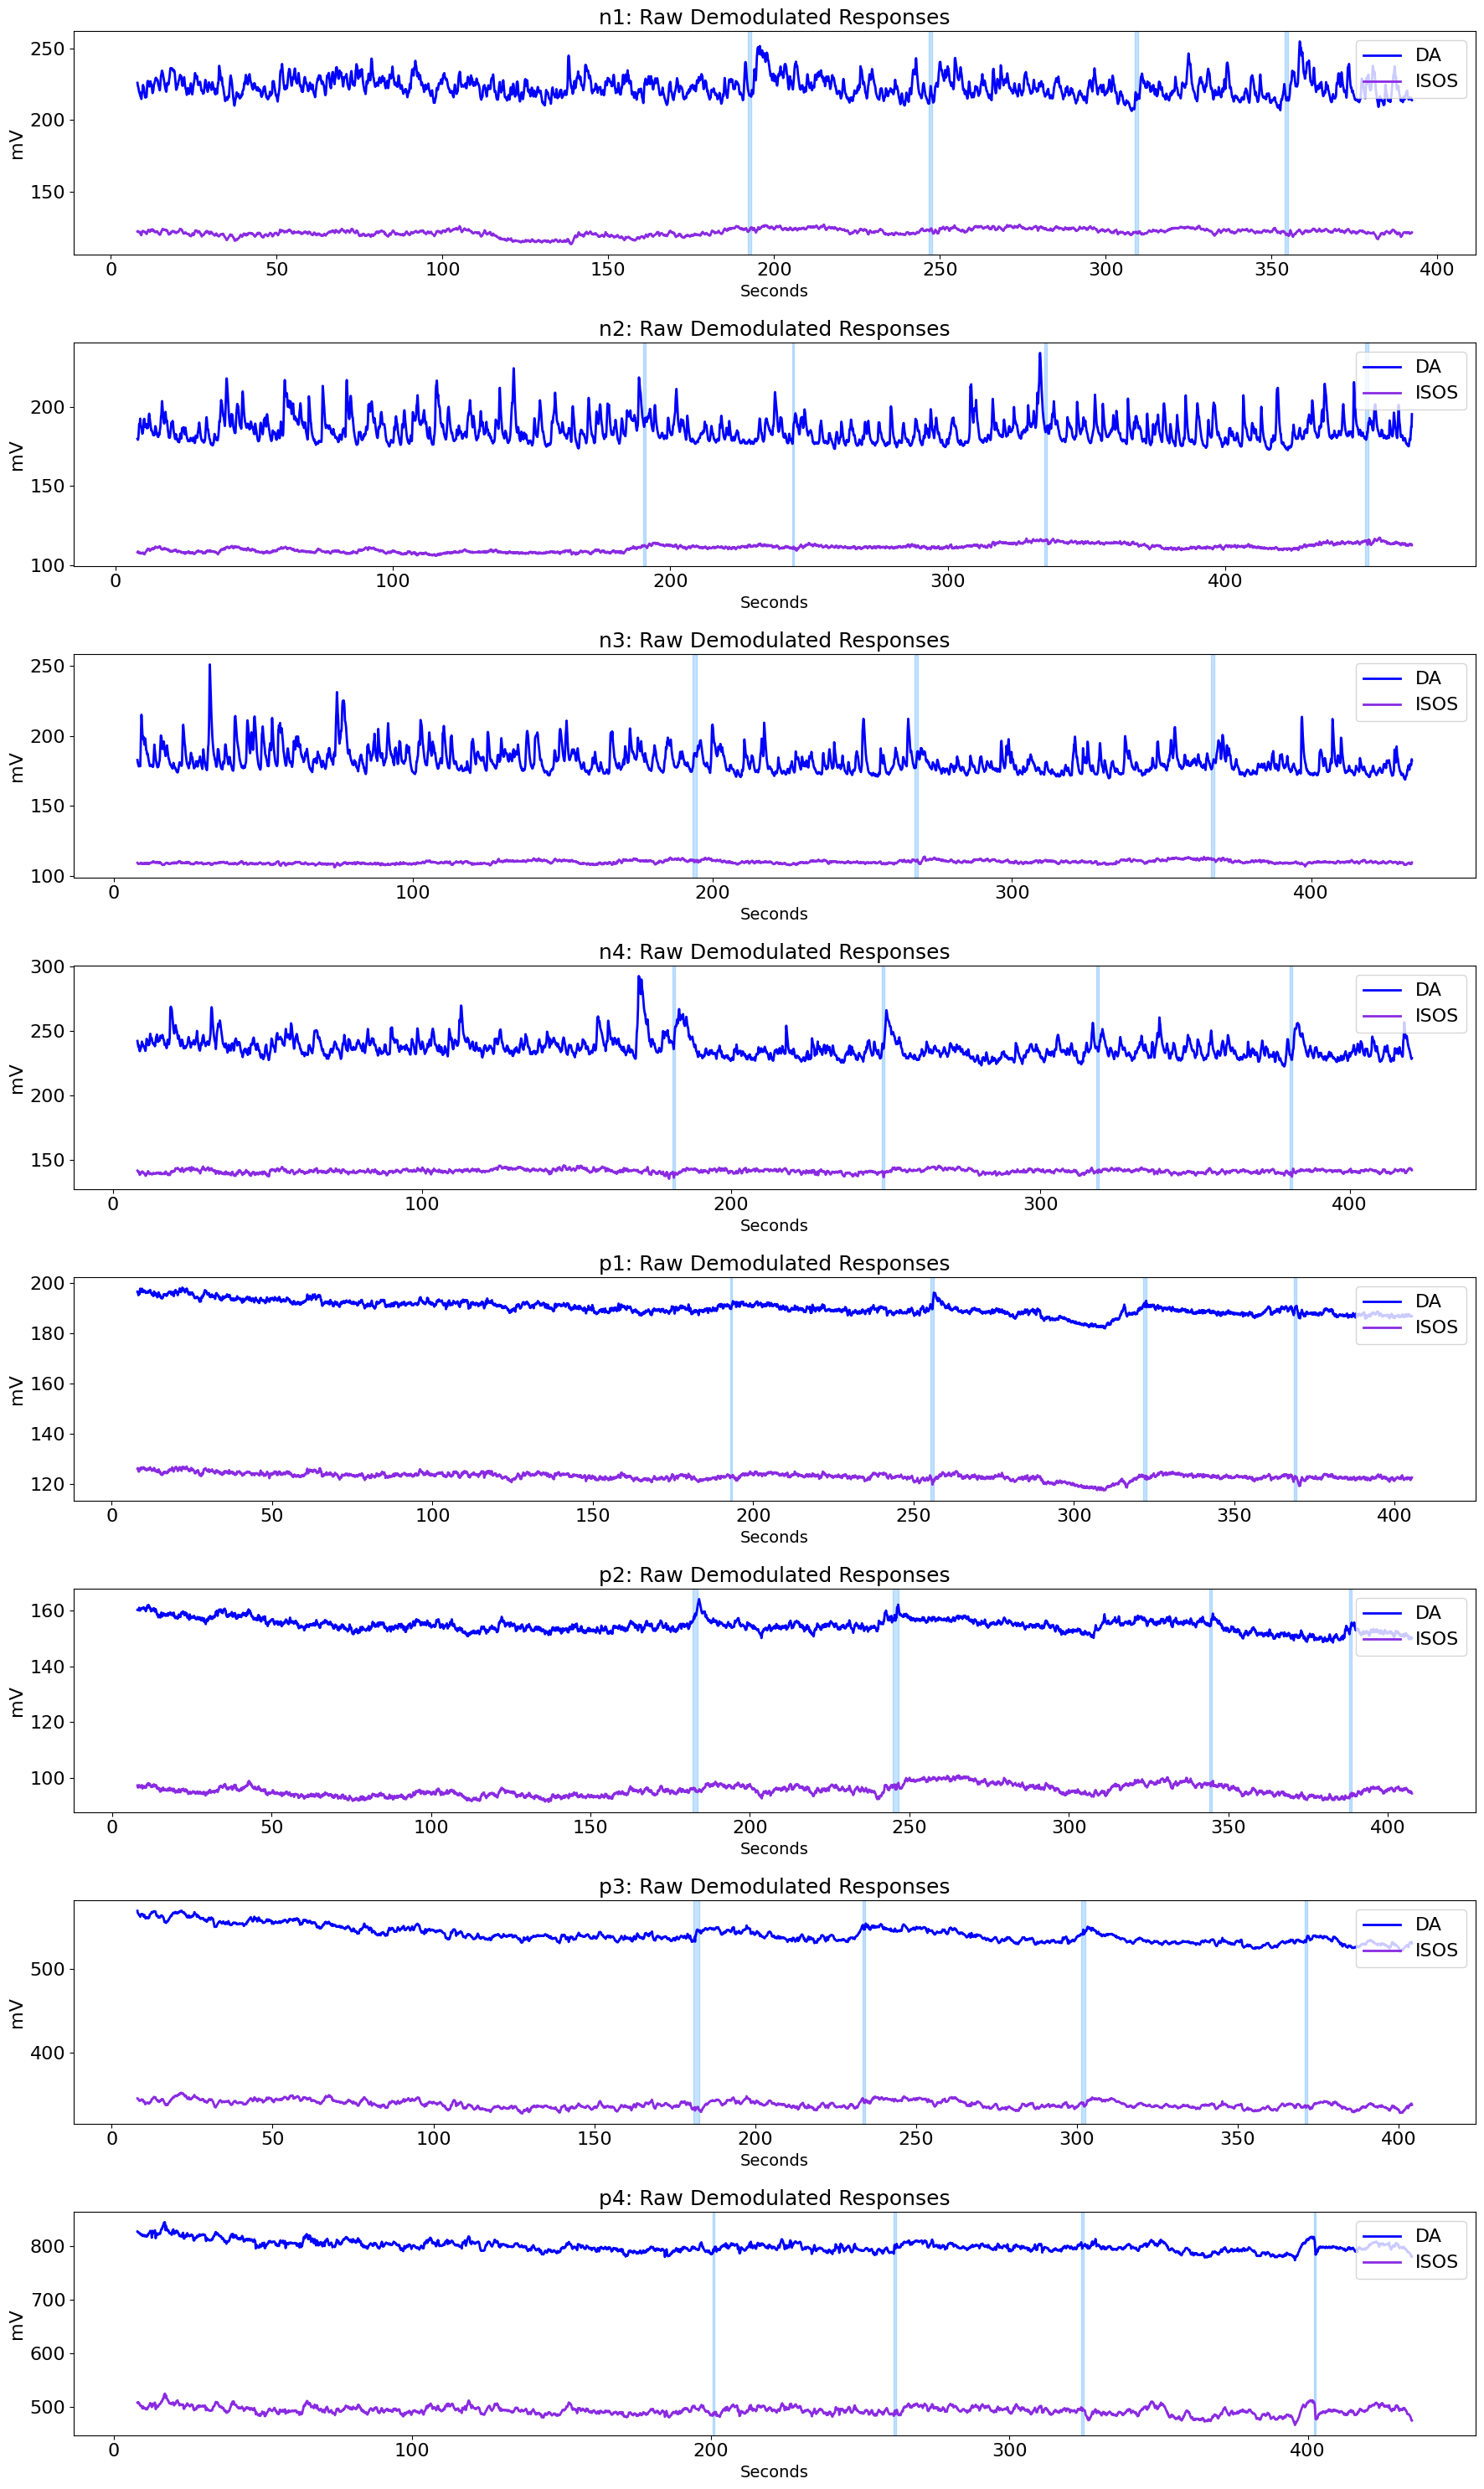

In [17]:
# Define the number of rows for subplots (one column with 8 rows)
rows = 8

# Initialize the figure with a smaller size and increase the font size
fig, axs = plt.subplots(rows, 1, figsize=(18, 30))  # Reduced size for the figure
axs = axs.flatten()  # Flatten to easily index

# Set larger font sizes for labels and titles
plt.rcParams.update({'font.size': 16})  # Increase the overall font size

# Loop over each recording folder in the experiment path
for i, folder_name in enumerate(os.listdir(experiment_path)):
    folder_path = os.path.join(experiment_path, folder_name)
    if os.path.isdir(folder_path):
        # Find the corresponding CSV file
        csv_file_name = f"{folder_name}.csv"
        csv_file_path = os.path.join(csv_base_path, csv_file_name)
        if os.path.exists(csv_file_path):
            # Process the TDT data
            tdt_data = tdt.read_block(folder_path)
            tdt_data_obj = TDTData(tdt_data, folder_path)
            tdt_data_obj.extract_manual_annotation_behaviors(csv_file_path)
            
            # Ensure the data is good
            tdt_data_obj.verify_signal()

            # Remove initial LED artifact
            tdt_data_obj.remove_initial_LED_artifact(t=8)
            
            # Downsample the data
            tdt_data_obj.smooth_signal()
            
            # Plot the raw trace of DA and ISOS signals
            if tdt_data_obj.DA in tdt_data_obj.streams and tdt_data_obj.ISOS in tdt_data_obj.streams:
                axs[i-1].plot(tdt_data_obj.timestamps, tdt_data_obj.streams[tdt_data_obj.DA], linewidth=2, color='blue', label='DA')
                axs[i-1].plot(tdt_data_obj.timestamps, tdt_data_obj.streams[tdt_data_obj.ISOS], linewidth=2, color='blueviolet', label='ISOS')
                axs[i-1].set_ylabel('mV')
                axs[i-1].set_xlabel('Seconds', fontsize=14)
                axs[i-1].set_title(f'{tdt_data_obj.subject_name}: Raw Demodulated Responses', fontsize=18)
                axs[i-1].legend(loc='upper right')
            
            # Add the behavior event spans
            behavior_event = 'Pinch_event'
            if behavior_event not in tdt_data_obj.behaviors.keys():
                raise ValueError(f"Behavior event '{behavior_event}' not found in behaviors.")
            behavior_onsets = tdt_data_obj.behaviors[behavior_event].onset
            behavior_offsets = tdt_data_obj.behaviors[behavior_event].offset
            for on, off in zip(behavior_onsets, behavior_offsets):
                axs[i-1].axvspan(on, off, alpha=0.25, color='dodgerblue')

# Adjust layout to ensure all plots fit nicely
plt.tight_layout()
plt.show()


Found Synapse note file: C:\Users\alber\OneDrive\Documents\PC_Lab\Photometry\Pilot_2\Cohort 1\Synapse\Tanks\5_6_24_Pinch_Test_P2-240506-084710\n1-240506-101729\Notes.txt
read from t=0s to t=392.45s
Found Synapse note file: C:\Users\alber\OneDrive\Documents\PC_Lab\Photometry\Pilot_2\Cohort 1\Synapse\Tanks\5_6_24_Pinch_Test_P2-240506-084710\n2-240506-092628\Notes.txt
read from t=0s to t=467.44s
Found Synapse note file: C:\Users\alber\OneDrive\Documents\PC_Lab\Photometry\Pilot_2\Cohort 1\Synapse\Tanks\5_6_24_Pinch_Test_P2-240506-084710\n3-240506-094458\Notes.txt
read from t=0s to t=433.7s
Found Synapse note file: C:\Users\alber\OneDrive\Documents\PC_Lab\Photometry\Pilot_2\Cohort 1\Synapse\Tanks\5_6_24_Pinch_Test_P2-240506-084710\n4-240506-100119\Notes.txt
read from t=0s to t=420.31s
Found Synapse note file: C:\Users\alber\OneDrive\Documents\PC_Lab\Photometry\Pilot_2\Cohort 1\Synapse\Tanks\5_6_24_Pinch_Test_P2-240506-084710\p1-240506-103809\Notes.txt
read from t=0s to t=405.53s
Found Synap

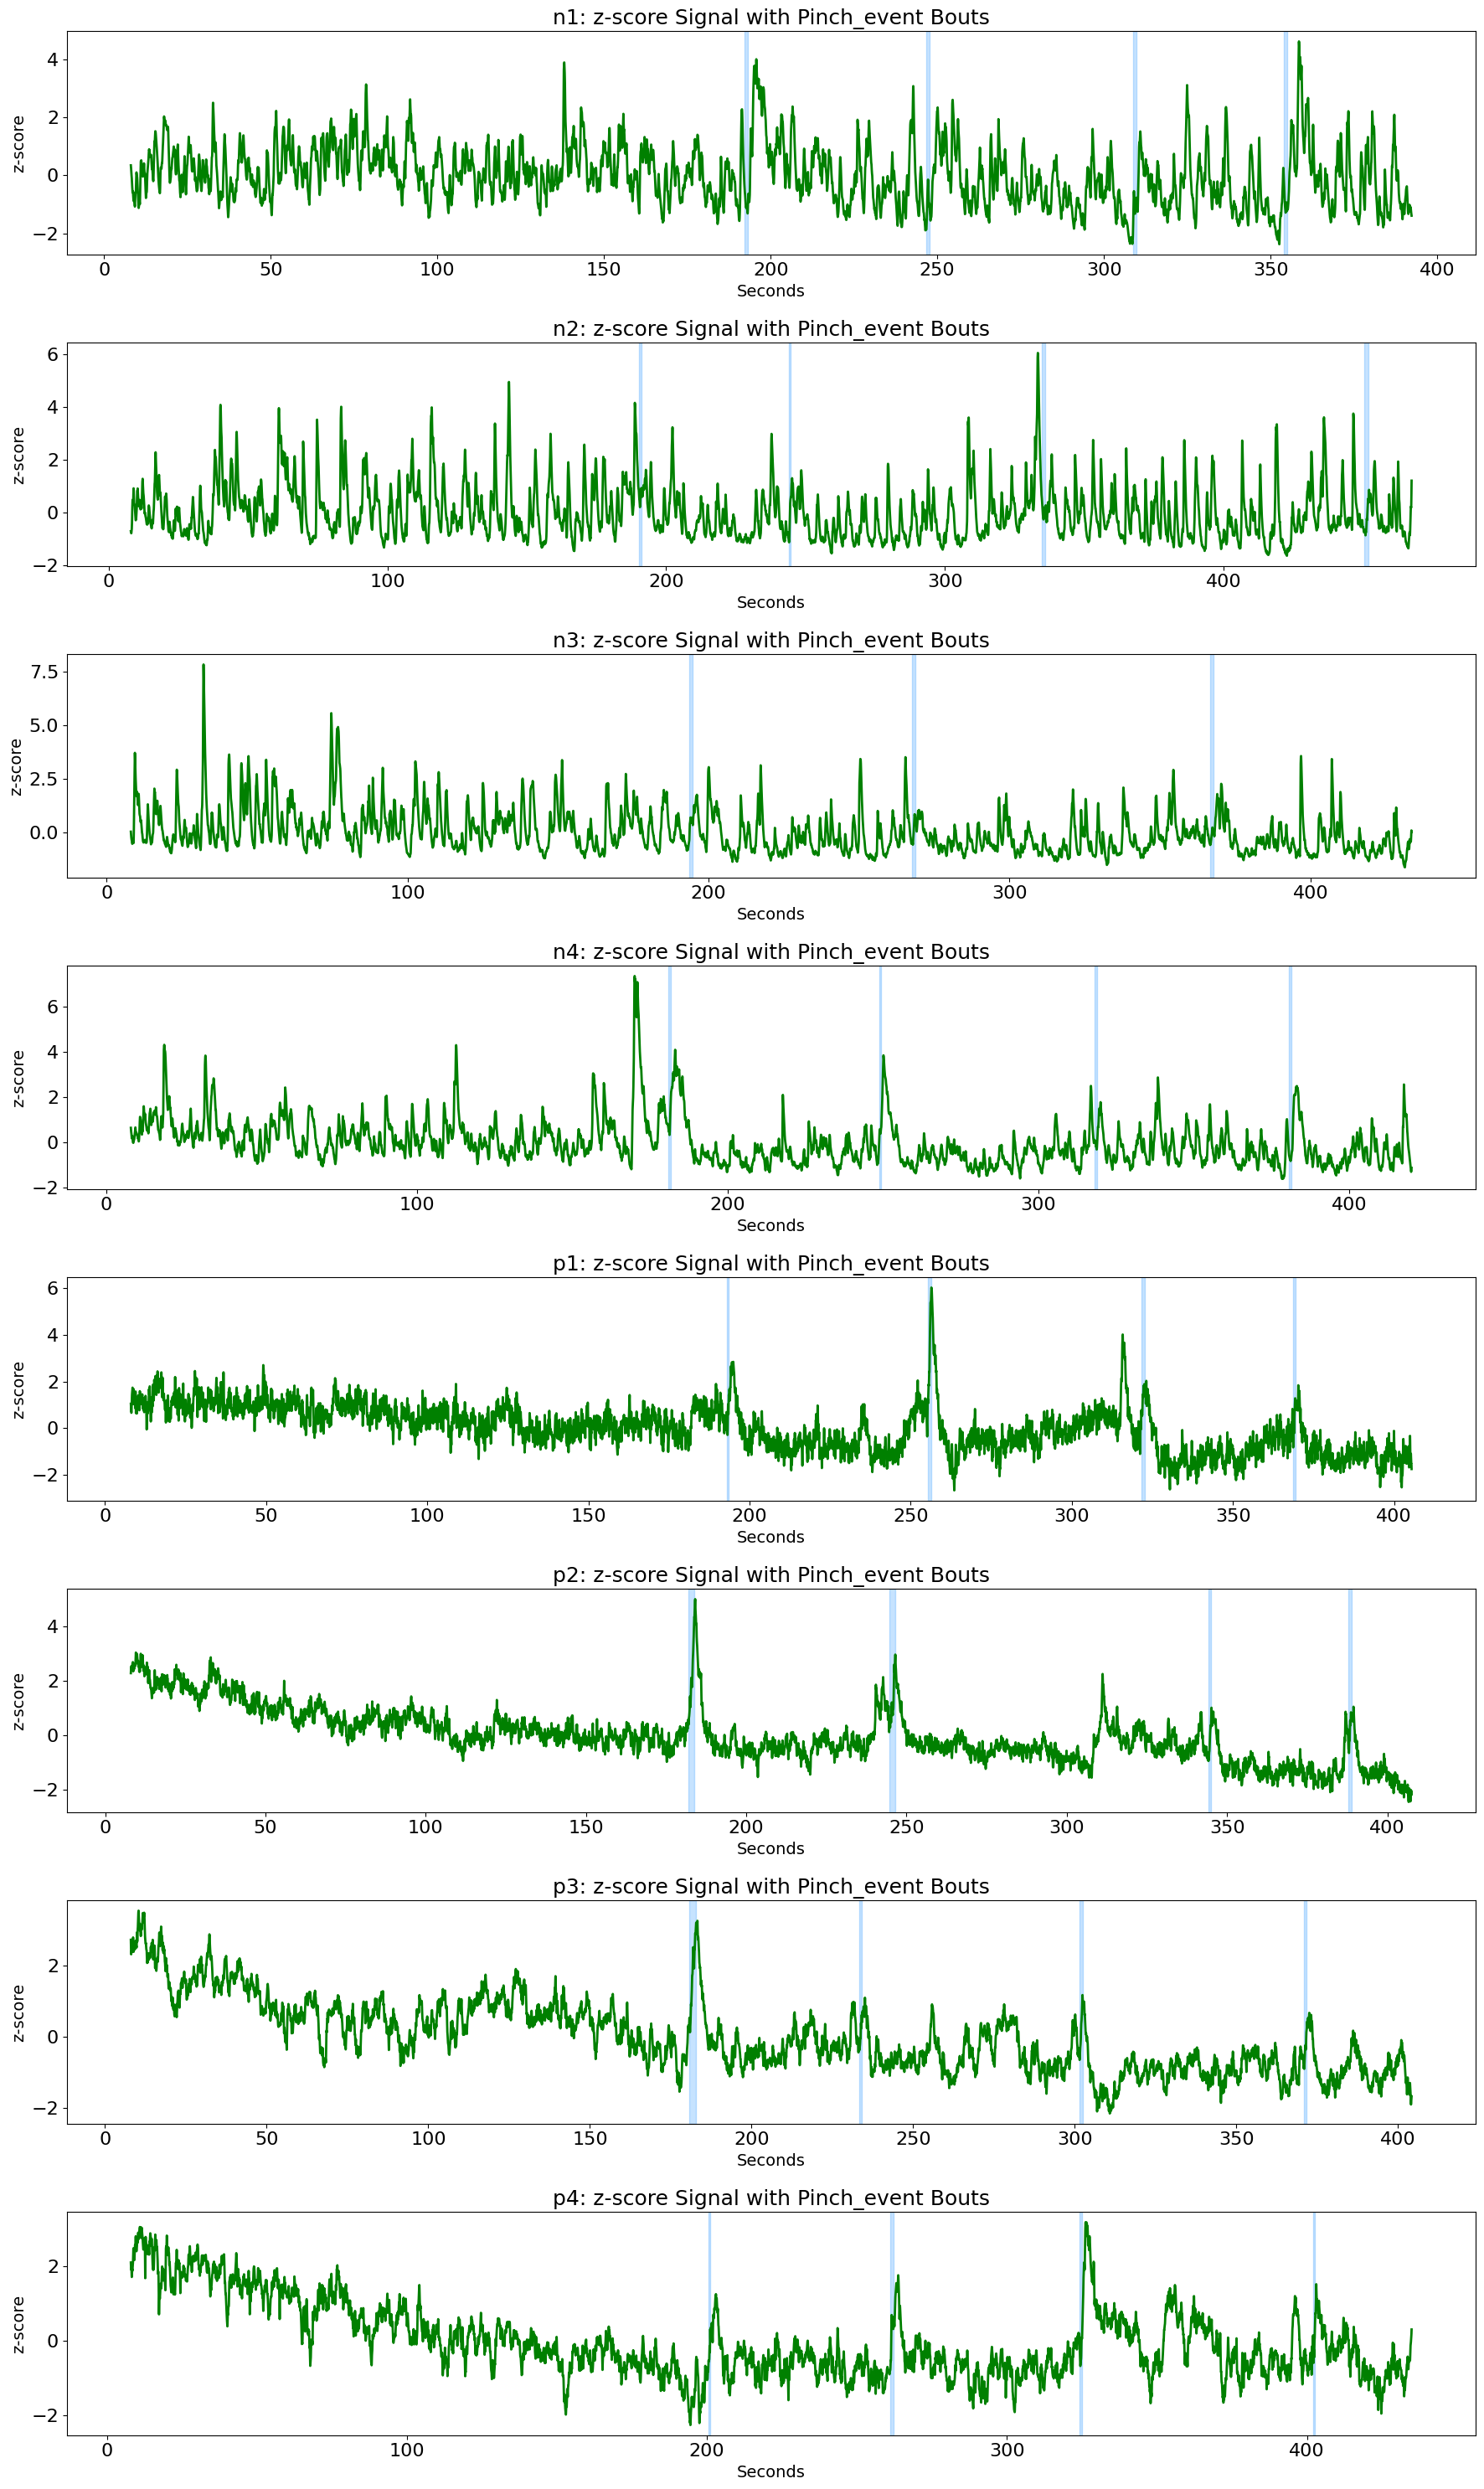

In [15]:
# Define the number of rows for subplots (one column with 8 rows)
rows = 8

# Initialize the figure with a smaller size and increase the font size
fig, axs = plt.subplots(rows, 1, figsize=(18, 30))  # Reduced size for the figure
axs = axs.flatten()  # Flatten to easily index

# Set larger font sizes for labels and titles
plt.rcParams.update({'font.size': 16})  # Increase the overall font size

# Loop over each recording folder in the experiment path
for i, folder_name in enumerate(os.listdir(experiment_path)):
    folder_path = os.path.join(experiment_path, folder_name)
    if os.path.isdir(folder_path):
        # Find the corresponding CSV file
        csv_file_name = f"{folder_name}.csv"
        csv_file_path = os.path.join(csv_base_path, csv_file_name)
        if os.path.exists(csv_file_path):
            # Process the TDT data
            tdt_data = tdt.read_block(folder_path)
            tdt_data_obj = TDTData(tdt_data, folder_path)
            tdt_data_obj.extract_manual_annotation_behaviors(csv_file_path)
            
            # Ensure the data is good
            tdt_data_obj.verify_signal()

            # Remove initial LED artifact
            tdt_data_obj.remove_initial_LED_artifact(t=8)
            
            # Downsample the data
            tdt_data_obj.smooth_signal()
            
            # Compute dFF
            tdt_data_obj.compute_dff()
            
            # Compute Z-score
            tdt_data_obj.compute_zscore()
            
            # Plot the data on the corresponding subplot
            y_data = tdt_data_obj.zscore
            behavior_name = 'Pinch_event'
            subject_name = tdt_data_obj.subject_name
            
            axs[i-1].plot(tdt_data_obj.timestamps, y_data, linewidth=2, color='green', label='zscore')
            
            # Add the behavior event spans
            behavior_event = behavior_name
            if behavior_event not in tdt_data_obj.behaviors.keys():
                raise ValueError(f"Behavior event '{behavior_event}' not found in behaviors.")
            behavior_onsets = tdt_data_obj.behaviors[behavior_event].onset
            behavior_offsets = tdt_data_obj.behaviors[behavior_event].offset
            for on, off in zip(behavior_onsets, behavior_offsets):
                axs[i-1].axvspan(on, off, alpha=0.25, color='dodgerblue')
            
            # Set labels and title for each subplot
            axs[i-1].set_ylabel('z-score', fontsize=14)  # Larger ylabel font
            axs[i-1].set_xlabel('Seconds', fontsize=14)  # Larger xlabel font
            axs[i-1].set_title(f'{subject_name}: z-score Signal with {behavior_name} Bouts', fontsize=18)  # Larger title font

# Adjust layout to ensure all plots fit nicely
plt.tight_layout()
plt.show()
